In [1]:
# Principle Component Analysis using for face dataset
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [2]:
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
n_samples , height , width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of Samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {}, \nNumber of output classes: {}\n".format(n_samples , height , width , n_features , n_classes))



Number of Samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096, 
Number of output classes: 40



In [4]:
# Suffle the data randomly and make train and test splits
# train - 75% and test set - 25%

X_train , X_test  , y_train , y_test = train_test_split(
  X , y , test_size = 0.25 , random_state=42)

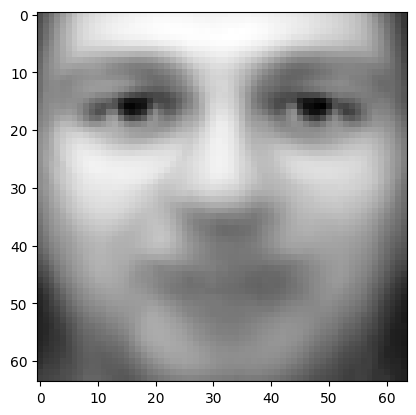

In [5]:
mean_image = np.mean(X_train , axis=0)
plt.figure
plt.imshow(mean_image.reshape((64 , 64)) , cmap=plt.cm.gray)
plt.xticks()
plt.show()

In [6]:
#making a function for visualization of the images as an album

def plot_gallery(images , h , w , titles=None , n_row=4 , n_col=4):
    plt.figure(figsize=(1.8 * n_col , 2.4 * n_row))
    plt.subplots_adjust(bottom=0 , left=.01 , right=.99 , top=.90 , hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row , n_col , i + 1)
        plt.imshow(images[i].reshape((h , w)) , cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i] , size=12)
        plt.xticks(())
        plt.yticks(())



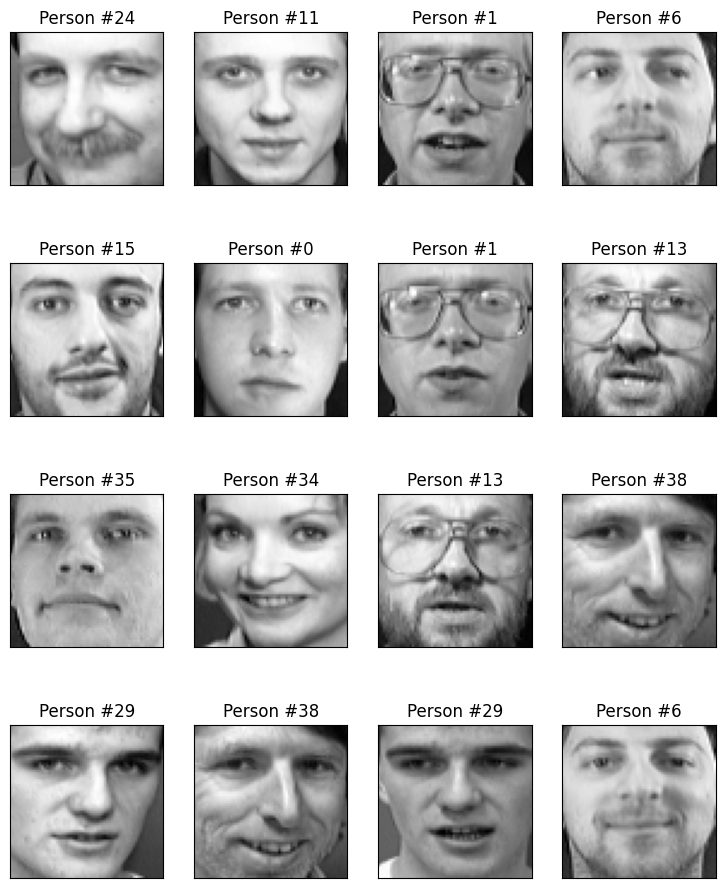

In [7]:
# visualize some faces from the training set

chosen_images = X_train[:16]
chosen_labels = y_train[:16]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images , height , width , titles)

In [9]:
# calculating the set of eigen faces

# reduce the dimensionality of the feature space

n_components = 150

# finding the top n_components principal components in the data

pca = PCA(n_components=n_components , whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components , height , width))

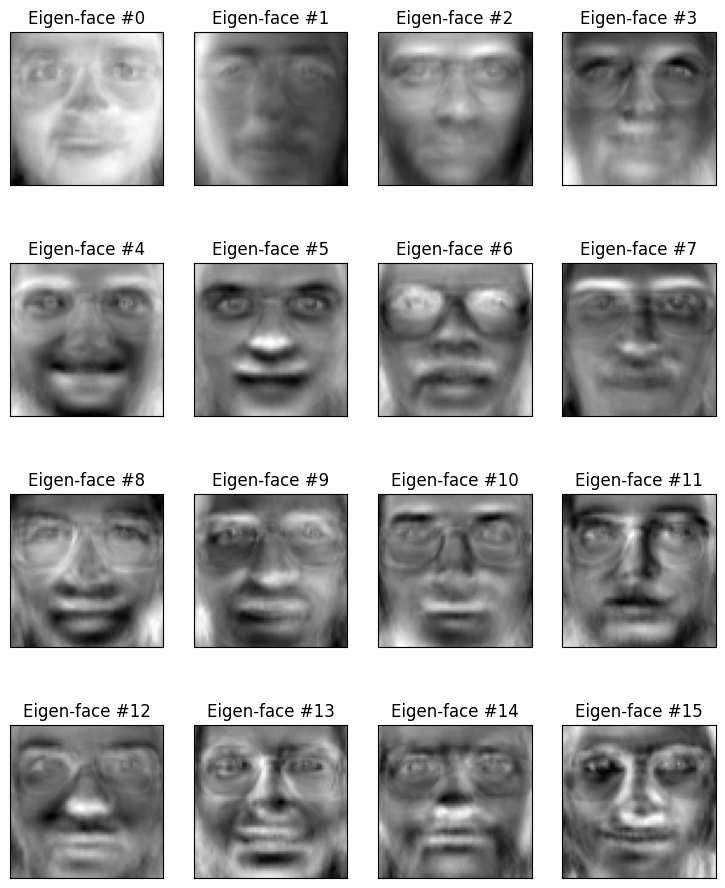

In [10]:
# visulize the eigen faces

titles = ['Eigen-face #'+str(i) for i in range(16)]
plot_gallery(eigenfaces , height , width , titles)

In [11]:
# transform the data to the vector space spanned by the eigen faces

# projecting the data onto the eigen space

X_train_pca  = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current Shape of input data matrix: " , X_train_pca.shape)


Current Shape of input data matrix:  (300, 150)


In [14]:
# using an KNN classifier in this transformed space to identify the faces

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca , y_train)


# detect the faces in the test set

y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_pred_test)):
    if y_pred_test[i] == y_test[i]:
       correct_count += 1.0

accuracy = correct_count/float(len(y_test))
print("Accuracy:" , accuracy)
print(classification_report(y_test , y_pred_test))
print(confusion_matrix(y_test , y_pred_test , labels = range(n_classes)))


Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2
           3       1.00      0.25      0.40         4
           4       0.60      1.00      0.75         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       1.00      0.29      0.44         7
           8       0.40      1.00      0.57         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      0.50      0.67         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       0.20      1.00      0.33         3
          15       1.00      0.50      0.67         2
          17       0.67      0.67      0.67         3
          18

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


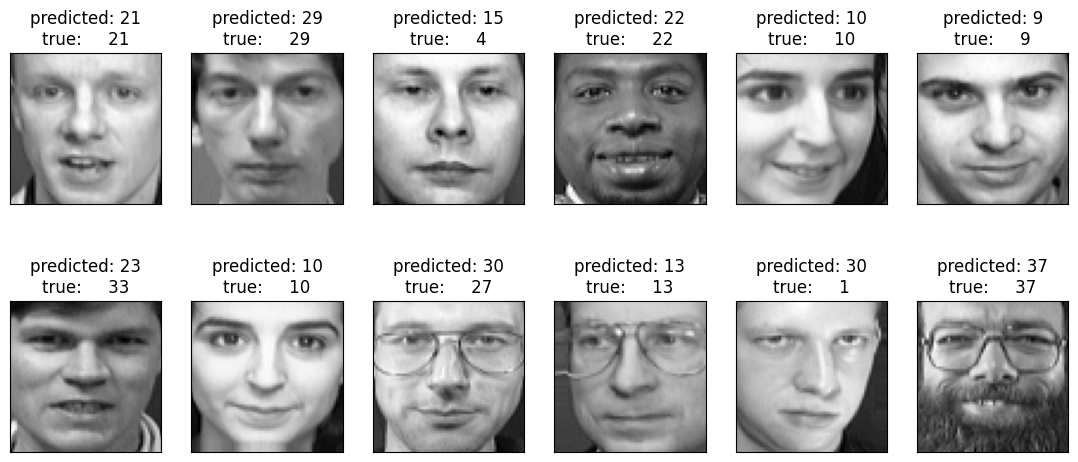

In [16]:
def title(y_pred , y_test , target_names , i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ' , 1)[-1]

    return 'predicted: %s\ntrue:     %s' % (pred_name , true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test , y_test , target_names , i) for i in range(y_pred_test.shape[0])]

plot_gallery(X_test , height , width , prediction_titles , n_row=2 , n_col = 6)
plt.show()

